<a href="https://colab.research.google.com/github/tanishqbololu/PyTorch/blob/main/4_pytorch_nn_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

# Lets build a Neural Network with 5 inputs and binary classification output and sigmoid activation on the hidden neuron.

In [4]:
# create model class

class Model(nn.Module):    # You should inherit from nn.Module class to use its functionality

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)    # nn.Linear(no.of inputs, no. of output)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    out = self.linear(features)   # out = z = wx + b
    out = self.sigmoid(out)       # act(z)
    return out



In [5]:
# create a dataset for checking our model
features = torch.rand(10,5)

# create a model
model = Model(features.shape[1])

# call model for forward pass
# model.forward(features)  --> this also works
model(features)  # But pytoch made this magic function to call your model as function and give features to do forward pass

tensor([[0.6391],
        [0.7123],
        [0.7352],
        [0.6259],
        [0.6645],
        [0.6652],
        [0.7223],
        [0.6917],
        [0.6878],
        [0.6842]], grad_fn=<SigmoidBackward0>)

In [8]:
# show model weights
model.linear.weight

Parameter containing:
tensor([[-0.0947,  0.3548,  0.0013,  0.1016,  0.3386]], requires_grad=True)

In [9]:
# show model bias
model.linear.bias

Parameter containing:
tensor([0.3884], requires_grad=True)

In [10]:
!pip install torchinfo

In [11]:
from torchinfo import summary

summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# Now lets build a NN for:
*   5 input neurons
*   3 hidden neurons with ReLU activation
*   1 output with sigmoid activation



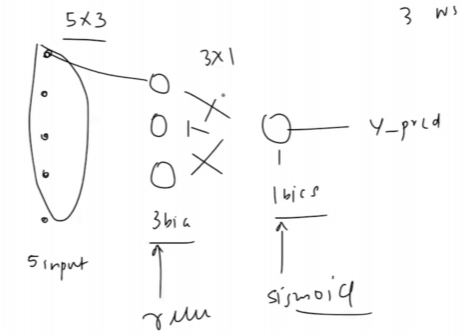

In [12]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.linear1 = nn.Linear(num_features, 3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3,1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out


In [13]:
features = torch.rand(10,5)
model = Model(features.shape[1])
model(features)

tensor([[0.4743],
        [0.4835],
        [0.4814],
        [0.4715],
        [0.4835],
        [0.4835],
        [0.4835],
        [0.4746],
        [0.4835],
        [0.4797]], grad_fn=<SigmoidBackward0>)

In [14]:
model.linear1.weight   # 15 weights

Parameter containing:
tensor([[ 0.3759,  0.3427, -0.3848,  0.0341, -0.2050],
        [ 0.2677,  0.1425, -0.2926, -0.3696,  0.2878],
        [-0.2578,  0.2105, -0.0395, -0.0707, -0.3759]], requires_grad=True)

In [17]:
model.linear1.bias  # 3 bias

Parameter containing:
tensor([-0.0600, -0.2633,  0.0401], requires_grad=True)

In [15]:
model.linear2.weight  # 3 weights

Parameter containing:
tensor([[-0.2677,  0.5085,  0.0097]], requires_grad=True)

In [18]:
model.linear2.bias  # 1 bias

Parameter containing:
tensor([-0.0661], requires_grad=True)

In [16]:
from torchinfo import summary
summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

But here with this approach we have simplified the architecture code with the help of nn.Module, but still the forward pass code is too cumbersome.
To solve this we use containers i.e nn.Sequential

In [19]:
import torch
import torch.nn as nn

class Model(nn.Module):

  def __init__(self, num_features):

    super().__init__()

    self.network = nn.Sequential(
        nn.Linear(num_features, 3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )


  def forward(self, features):
    out = self.network(features)
    return out


In [20]:
features = torch.rand(10,5)
model = Model(features.shape[1])
model(features)

tensor([[0.5230],
        [0.5346],
        [0.5307],
        [0.5347],
        [0.5333],
        [0.5444],
        [0.5192],
        [0.5433],
        [0.5167],
        [0.5473]], grad_fn=<SigmoidBackward0>)